### Goal for tech challenge: Looking to find the best combustible

Importing the correct librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the dataset for the tech challenge

In [2]:
data = pd.read_csv('measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


Finding the data types for each column

In [3]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

Renaming specific columns to create cohesion

In [4]:
data = data.rename(columns={'refill liters':'refill_liters','refill gas':'refill_gas'})

Looking at the individual values in each column to see the variation in values

In [5]:
for col in data:
    print(data[col].value_counts(dropna=False))

11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64
5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: consume, dtype: int64
42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59 

Looking at the number of NaNs values per column

In [6]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

Replacing the commas with periods to later convert columns into numerical values

In [7]:
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')

In [8]:
data['refill_liters'] = data['refill_liters'].str.replace(',','.')

In [9]:
data['refill_liters'] = data['refill_liters'].astype(float)

In [10]:
data['temp_inside'] = data['temp_inside'].astype(float)

Finding the average of columns refill_liters and temp_inside to replace the NaN values

In [11]:
data.describe() 

,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters
count,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [12]:
data['refill_gas']= data['refill_gas'].fillna('other')

In [13]:
data['temp_inside']= data['temp_inside'].fillna('21.92')

In [14]:
data['refill_liters'] = data['refill_liters'].fillna('37.11')

Dropped specials column because there are too many unique values

In [15]:
data = data.drop(columns=["specials","refill_gas","refill_liters"], axis = 1)

In [16]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [17]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,"4,2",30,21.5,13,E10,0,0,0
2,"11,2","5,5",38,21.5,15,E10,0,0,0
3,"12,9","3,9",36,21.5,14,E10,0,0,0
4,"18,5","4,5",46,21.5,15,E10,0,0,0


In [18]:
data.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [19]:
for col in data:
    print(data[col].value_counts(dropna=False))

11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64
5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: consume, dtype: int64
42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59 

In [20]:
for col in ['AC', 'rain', 'sun','distance','temp_inside']:
    data[col] = data[col].astype('object')

Looking at the different data types and seeing what needs to be converted

In [21]:
data.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC              object
rain            object
sun             object
dtype: object

In [22]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,"4,2",30,21.5,13,E10,0,0,0
2,"11,2","5,5",38,21.5,15,E10,0,0,0
3,"12,9","3,9",36,21.5,14,E10,0,0,0
4,"18,5","4,5",46,21.5,15,E10,0,0,0


As we can see from the data above there are a couple of point worth considering:
<br> - drivers at a longer distance consumed more per 100KM but were at a lower speed. Therefore this means that they were driving slower but for longer distances.
<br> - Drivers at a smaller distance but higher speed could be that they were stopping and running several times at once (potentially at a stop light)
<br> - Drivers at a shorter distance but consumed higher amounts and went faster meant that that they were stopping and running but at higher frequency.

In [23]:
data['distance'] = data['distance'].str.replace(',','.')

In [24]:
data['consume'] = data['consume'].str.replace(',','.')

In [25]:
data['consume'] = data['consume'].astype(float)

In [26]:
data['distance'] = data['distance'].astype(float)

In [27]:
data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside      object
temp_outside      int64
gas_type         object
AC               object
rain             object
sun              object
dtype: object

In [28]:
correlations_matrix = data.corr()   
correlations_matrix

,distance,consume,speed,temp_outside
distance,1.000000,-0.128967,0.562299,0.088175
consume,-0.128967,1.000000,-0.227866,-0.320811
speed,0.562299,-0.227866,1.000000,0.015411
temp_outside,0.088175,-0.320811,0.015411,1.000000


In [29]:
data['lt_trip'] = data['consume'] * data['distance']/100

In [30]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,lt_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.7084


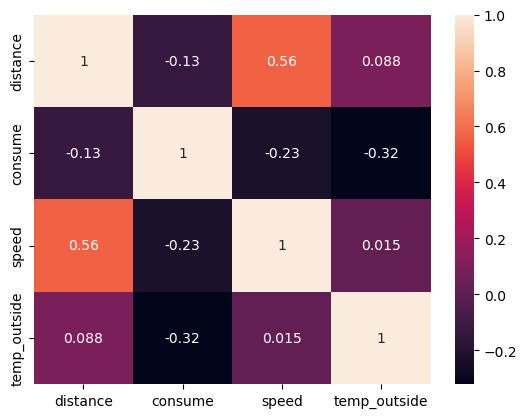

In [31]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

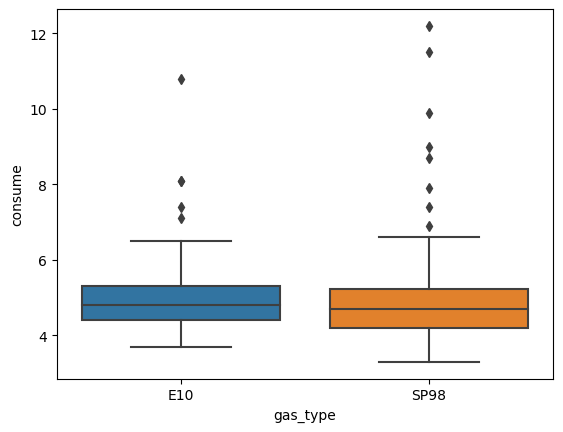

In [32]:
sns.boxplot(x="gas_type", y="consume", data=data)
plt.show()

<AxesSubplot:xlabel='gas_type', ylabel='speed'>

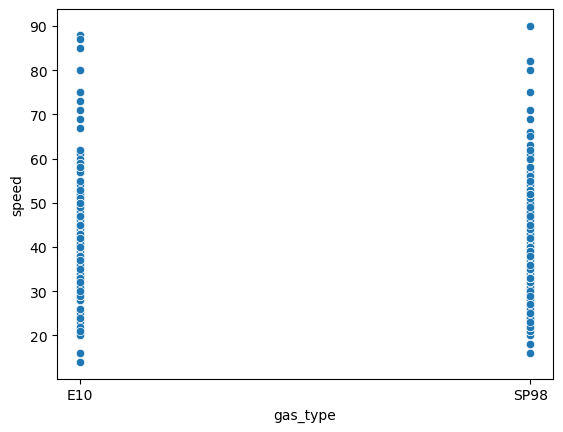

In [33]:
sns.scatterplot(data=data, x="gas_type", y="speed")

In [34]:
data['gas_type'] = data['gas_type'].astype(str)

Changing the values for SP98 and E10 to numeric and they will be needed in the hypothesis testing. 

In [35]:
data['gas_type'] = data['gas_type'].replace('SP98',1)

In [36]:
data['gas_type'] = data['gas_type'].replace('E10',2)

In [37]:
data.head(50)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,lt_trip
0,28.0,5.0,26,21.5,12,2,0,0,0,1.4000
1,12.0,4.2,30,21.5,13,2,0,0,0,0.5040
2,11.2,5.5,38,21.5,15,2,0,0,0,0.6160
3,12.9,3.9,36,21.5,14,2,0,0,0,0.5031
4,18.5,4.5,46,21.5,15,2,0,0,0,0.8325
5,8.3,6.4,50,21.5,10,2,0,0,0,0.5312
6,7.8,4.4,43,21.5,11,2,0,0,0,0.3432
7,12.3,5.0,40,21.5,6,2,0,0,0,0.6150
8,4.9,6.4,26,21.5,4,2,0,0,0,0.3136
9,11.9,5.3,30,21.5,9,2,0,0,0,0.6307


##### Upon looking at the data, it is apparent that there are 2 main gas sources that consumers use. It is clear through the data that there is a difference is gas types between SP98 and E10, although we need to consider which gas type has been the most consumed. 

Therefore the hypothesis test would be:
Null hypothesis: the consumption of SP98 is less than or equal to E10 (<=)
Alternative hypothesis: the consumption of SP98 is more than E10 (>)
Significance level of 0.05%

In [63]:
from scipy.stats import ttest_1samp
import numpy as np
import scipy.stats as st

In [60]:
data1= data[data['gas_type']==1]['lt_trip']
data1.reset_index()
data1 = pd.DataFrame(data1)
data1= data1.rename(columns = {'lt_trip':"SP98"})
data1

,SP98
44,0.1782
45,0.1980
46,0.7242
47,0.7840
48,0.5782
...,...
383,0.5920
384,0.6923
385,0.6080
386,0.7084


In [59]:
# data2 = data[data['gas_type']==2]['lt_trip']
# data2.reset_index()
data2 = pd.DataFrame(data2)
data2= data2.rename(columns = {'lt_trip':"E10"})
data2

,E10
0,1.4000
1,0.5040
2,0.6160
3,0.5031
4,0.8325
...,...
344,0.8211
345,0.6400
346,0.7392
347,0.6708


In [69]:
df = pd.concat([data1,data2], axis=1)
df

,SP98,E10
44,0.1782,NaN
45,0.1980,NaN
46,0.7242,NaN
47,0.7840,NaN
48,0.5782,NaN
...,...,...
344,NaN,0.8211
345,NaN,0.6400
346,NaN,0.7392
347,NaN,0.6708


In [ ]:
Unfortunately I'm unable to complete the tech challenge as I still need to assert the NaN values in the dataFrame and I didn't have enough time to do so.